In [44]:
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import preprocessing


In [33]:
import time
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from pandas.plotting import parallel_coordinates
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.datasets import load_iris
# cross_val_score: 다양한 샘플링으 ㄹ해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

# 주요 라이브러리 import

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Users/hi/Himedia_jupyter/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
import scipy.io as spio

from pandas.plotting import parallel_coordinates

In [2]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]

In [8]:
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


In [3]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [4]:
train_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [5]:
test_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

Text(0.5, 1.0, 'district visualization in 2d plane')

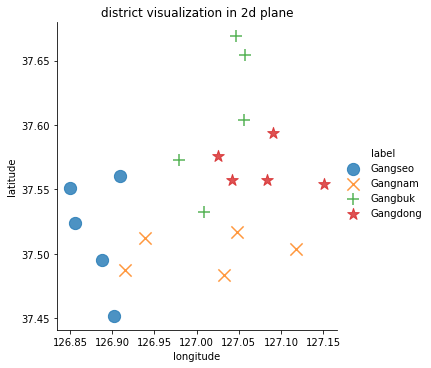

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 경도, 위도에 따른 데이터 시각화
sns.lmplot('longitude', 'latitude', data=train_df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x", "+", "*"],
           hue="label")

# title
plt.title('district visualization in 2d plane')

In [24]:
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [78]:
dtree = DecisionTreeClassifier(
    criterion="gini",
    random_state=35)

dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(
    C=0.1, 
    gamma=0.003,
          
    probability=True,
    random_state=35
).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [79]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.95
knn   :  1.0
svm   :  0.95


In [53]:
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dtree), 
        ('knn', knn), 
        ('svm', svm)], 
    weights=[1,1,1], 
    voting='hard').fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
hard_vote = accuracy_score(y_test, hard_voting_predicted)

In [54]:
hard_vote

0.95

In [55]:
voting_clf2 = VotingClassifier(
    estimators=[
        ('decision_tree', dtree), 
        ('knn', knn), 
        ('svm', svm)], 
    weights=[1,1,1], 
    voting='soft').fit(X_train, y_train)

soft_voting_predicted = voting_clf2.predict(X_test)
soft_vote = accuracy_score(y_test, soft_voting_predicted)

In [56]:
soft_vote

0.95

In [57]:
xlist = ['knn', 'svm', 'dtree', 'hard', 'soft']
ylist = [accuracy_score(y_test, knn_predicted), accuracy_score(y_test, svm_predicted), accuracy_score(y_test, dtree_predicted), hard_vote, soft_vote]

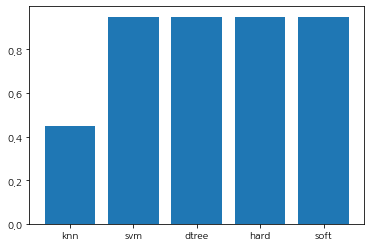

In [58]:
plt.bar(xlist,ylist)
plt.show()

In [49]:
## Cross-validation(교차검증)
model_list = []
model_list.append(("LR",LogisticRegression()))
model_list.append(("NB",GaussianNB()))
model_list.append(("RF",RandomForestClassifier()))
model_list.append(("SVC",SVC(C=0.1, gamma=0.003,probability=True, random_state=35
)))
model_list.append(("Dtree",DecisionTreeClassifier()))
model_list.append(("KNN",KNeighborsClassifier()))
model_list

def print_cv(model, X_train, y_train, k):
    scores = cross_val_score(model, X_train, y_train, cv = 5)
    print(i, k, '----교차검증시작----')
    print('결과:', scores)
    mean_scores = np.mean(scores)
    print('평균:', mean_scores)
    return scores, mean_scores 
# 함수의 결과로 여러개의 데이터를 return
# 튜플로 묶어서 반환하게 된다.(scores, mean_scores)


k_number=[5, 10]
sc_list = []
mean_sc_list = []
for i, model in model_list:
    for k in k_number:
        sc, mean_sc = print_cv(model, X_train, y_train, k)
        sc_list.append(sc)
        mean_sc_list.append(mean_sc)
    print()
print('**********************************************************************************************************************')
print()
print()
print('모델명:', model_list,'k:', k_number)
print()
print()
print('전체 모델의 교차 검증 결과 리스트:')
print(sc_list)
print('전체 모델의 교차 검증 결과 평균:')
print(mean_sc_list)
print()
# 최대 평균값 ==
mean_sc_list_nan = []
for i in mean_sc_list:
    if np.isnan(i):
        pass
    else:
        mean_sc_list_nan.append(i)
max_value = np.max(mean_sc_list_nan)
# 최대 평균값 인덱스 ==


max_index = np.nanargmax(mean_sc_list)
# 최대 평균값 모델명 ==
max_model = model_list[max_index//2][0]
if max_index%2 ==0:
    k_max = 5
else:
    k_max = 10

print('최고 교차 검증 평균>> ', max_value)
print('최고 교차 검증 인덱스>> ', max_index)
print('최고 교차 검증 모델링>> ', max_model, 'k =', k_max)







def grid_search(model, params, k):
    gs_model = GridSearchCV(model, params, cv=k)
    ## gs_model는 최적의 파라메터가 적요된 모델의 객체!
    gs_model.fit(X_train, y_train)
    print('best_estimator:',gs_model.best_estimator_) ##최적의 파라메터가 적용된 모델 객체
    print('best_score:',gs_model.best_score_) ##최적의 파라메터가 적용된 모델로 학습한 정확도 결과(acc)
    print('best_params:',gs_model.best_params_) ##최적의 파라메터
    print('gs_model:',gs_model) #grid_search 객체
    return gs_model.best_estimator_

params = { #하이퍼파라메터 설정으로 가질 수 있는 모든 경우의 수=> 4*3*2: 24
    'max_depth':[3, 5, 7, 10], #key:하이퍼파라메터명, values는 list
    'random_state': [1,3,5],
    'criterion': ['gini','entropy'] #혼란스러운 정도(분류의 정도)를 계산하는 기준
}
best_model = []

for i, model in model_list:
    try:
        print('----clf model:', model, '----')
        best_model.append(grid_search(model, params, 5))
        print()
    except Exception as e:
        print(e)
        print()
print('=====================best_model:', best_model)

## 최적의 하이퍼 파라메터로 모델 객체 생성
## fit()
dt_gs = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=3)
dt_gs.fit(X_train, y_train)
rf_gs = RandomForestClassifier(criterion = 'gini', max_depth=3, random_state=5)
rf_gs.fit(X_train, y_train)

## 테스트 데이터로 검증해보자!
def test_validation(model, X_test, y_test):
    predict_result = model.predict(X_test)
    acc = accuracy_score(y_test, predict_result)
    print("accuracy:", acc)
    cf = confusion_matrix(y_test, predict_result)
    ##실제(c) --> 예측(c, sg), 실제(sg)==> 예측(sg,c),
    # 이진분류(binary classification)인 경우에는
    # 예측할 수 있는 경우의 수는 4가지!
    # 4가지를 표형태로 정리해주는 것이 confusion matrix!
    # 첫반째 행/열은 c, 두번째 행/열은 sg, abc순으로 행/열이 결정
    print('confusion_matrix:\n', cf)
    ## confusion matrix는 binary classfication 인 경우에는 보기가 괜찮으나, 
    ## multi class classification인 경우에는 보기가 힘들어서
    ## classification_report 를 사용하는게 보기 편하다
    c_report = classification_report(y_test, predict_result)
    print('classification_report:\n', c_report)

test_validation(dt_gs, X_test, y_test)

LR 5 ----교차검증시작----
결과: [0.25 0.5  0.5  0.5  0.5 ]
평균: 0.45
LR 10 ----교차검증시작----
결과: [0.25 0.5  0.5  0.5  0.5 ]
평균: 0.45

NB 5 ----교차검증시작----
결과: [0.5  0.5  1.   1.   0.75]
평균: 0.75
NB 10 ----교차검증시작----
결과: [0.5  0.5  1.   1.   0.75]
평균: 0.75

RF 5 ----교차검증시작----
결과: [0.5  1.   0.75 0.75 0.5 ]
평균: 0.7
RF 10 ----교차검증시작----
결과: [0.5  0.75 0.75 0.75 0.5 ]
평균: 0.65

SVC 5 ----교차검증시작----
결과: [0.25 0.5  1.   0.75 0.75]
평균: 0.65
SVC 10 ----교차검증시작----
결과: [0.25 0.5  1.   0.75 0.75]
평균: 0.65

Dtree 5 ----교차검증시작----
결과: [0.25 0.75 0.75 1.   0.5 ]
평균: 0.65
Dtree 10 ----교차검증시작----
결과: [0.5  0.75 0.75 1.   0.5 ]
평균: 0.7

KNN 5 ----교차검증시작----
결과: [0.5 0.5 0.5 0.5 0.5]
평균: 0.5
KNN 10 ----교차검증시작----
결과: [0.5 0.5 0.5 0.5 0.5]
평균: 0.5

**********************************************************************************************************************


모델명: [('LR', LogisticRegression()), ('NB', GaussianNB()), ('RF', RandomForestClassifier()), ('SVC', SVC(C=0.1, gamma=0.003, probability=True, random_st

In [42]:
def display_decision_surface(clf,X, y):
    
    # 챠트의 범위가 모든 학습 데이터를 포함하도록 설정
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    # 파라미터 설정
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # 학습 데이터를 챠트에 표시
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, 
                    X.loc[idx].latitude, 
                    c=color, 
                    label=le.classes_[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=200)

    # 챠트 제목
    plt.title("Decision surface of a decision tree",fontsize=16)
    # 챠트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    # x축의 이름과 폰트 크기 설정
    plt.xlabel('longitude',fontsize=16)
    # y축의 이름과 폰트 크기 설정
    plt.ylabel('latitude',fontsize=16)
    # 챠트 크기 설정
    plt.rcParams["figure.figsize"] = [7,5]
    # 챠트 폰트 크기 설정
    plt.rcParams["font.size"] = 14
    # x축 좌표상의 폰트 크기 설정
    plt.rcParams["xtick.labelsize"] = 14
    # y축 좌표상의 폰트 크기 설정
    plt.rcParams["ytick.labelsize"] = 14

    # 챠트 그리기
    plt.show()

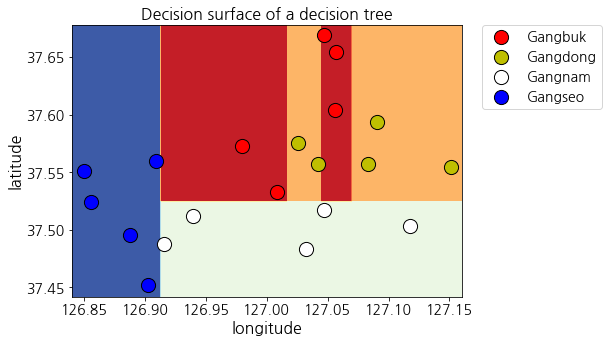

In [80]:
from sklearn import tree
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)

clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)
display_decision_surface(clf,X_train, y_encoded)

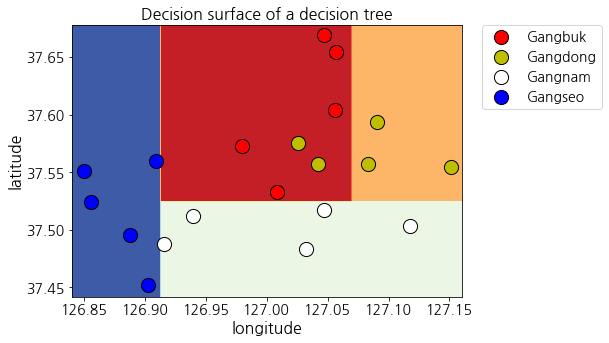

In [86]:
clf = tree.DecisionTreeClassifier(max_depth=3, 
                                  min_samples_split=3,
                                  min_samples_leaf=3, 
                                  random_state=35).fit(X_train, y_encoded.ravel())
display_decision_surface(clf,X_train, y_encoded)

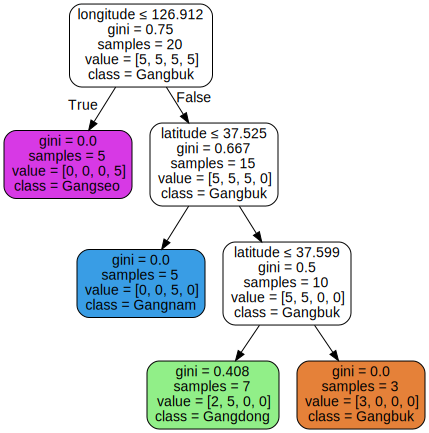

In [68]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("seoul")

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['longitude','latitude'],  
                         class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [69]:
pred = clf.predict(X_test)

In [70]:
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), le.classes_[pred])) )


accuracy : 0.9


In [71]:
comparison = pd.DataFrame({'prediction':le.classes_[pred], 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam
